#### TP Semanal 5

### Enunciado

Diseñar un filtro pasabajos normalizado Bessel  para obtener un Retardo de Grupo D(w) de 1 segundo.

<img src="image43.png">

| $$D[seg]$$ | $$ \alpha_{Max} [dB] $$ | $$ w_p [\frac{rad}{seg}] $$ |  $$ w_s [\frac{rad}{seg}] $$  |
|----------|------|----------|----------|
| 1      | 1   | 1   | 2.5   |

Utilizando el metodo de Storch ( pag. 403 del Schaumann) obtener la T(s) Bessel para N: 2, 3 y 4 normalizados para D = 1  

Elegir la T(s) con el minimo orden que cumple con ⍺Max = 1 dB

Evaluar el Retardo de Grupo  D(2.5)
. Expresar en forma porcentual [%] el error o desviamiento respecto a D(0)

Sintetizar el circuito NORMALIZADO con estructuras Sallen-Key con K=1 ( real. negativa unitaria )  

<img src="image44.png">

### CODE

### Transferencias

## Bessel Orden: 1

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Bessel Orden: 2

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Bessel Orden: 3

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Bessel Orden: 4

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

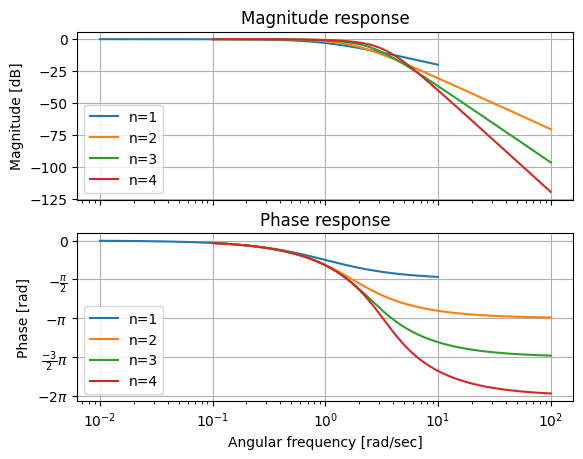

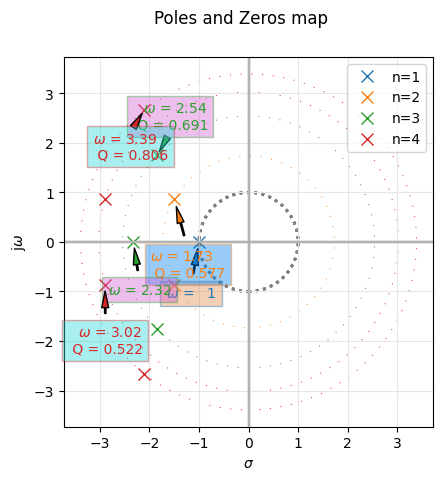

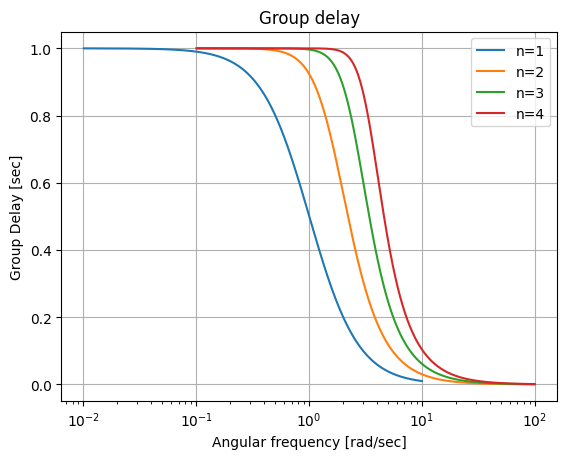

In [2]:
import scipy.signal as sig
import matplotlib.pyplot as plt
from pytc2.sistemas_lineales import tf2sos_analog, pretty_print_SOS, analyze_sys, pretty_print_lti
from IPython.display import display, Math, Markdown
import numpy as np

OMEGA = 1.0  # Frecuencia en radianes por segundo
ALPHA_MAX = 1.0

sistemas = []

display(Markdown("### Transferencias"))

for orden in [1,2,3,4]:

    z,p,k = sig.besselap(orden,'delay')
    num, den = sig.zpk2tf(z,p,k)

    sos_cheb = tf2sos_analog(num, den)
    display(Markdown("## Bessel Orden: " + str(orden)))
    display(Math("T(s) = " + pretty_print_lti(num=num,den=den, displaystr=False)))
    display(Math("T(s) = " + pretty_print_SOS(sos_cheb, mode='omegayq', displaystr=False)))

    H = sig.TransferFunction( num, den )
    sistemas.append(H)

    w, H_jw = sig.freqresp(H, [OMEGA])

    ts_alpha_max = 20 * np.log10(1/abs(H_jw[0]))

    display(Math(r"\alpha_{max}(w=1) = %0.4f dB" % ts_alpha_max))

analyze_sys(sistemas, ["n=1","n=2","n=3","n=4"])

plt.show()


### Manuscritos

In [4]:
from IPython.display import IFrame
IFrame("./tp5tc2.pdf", width="100%", height="600")

### Simulaciones

## D(1) = 1seg

<img src="image40.png">

<img src="image39.png">

## D(1) = 200useg

<img src="image41.png">

<img src="image42.png">